In [1]:
import SIMSIToolBox
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from copy import deepcopy
import umap
from sklearn.cluster import KMeans
import pickle as pkl
import molmass
import SIMSIToolBox.recalibration
import importlib
importlib.reload(SIMSIToolBox)
import seaborn as sb
import matplotlib

In [2]:
datadir = "X:/MSI_Shared_Data/13CImagingManuscript/raw_data/non-perfused/desi/13C/"

In [3]:
peaklist = pd.read_csv(datadir + "../30092022_desi_targets_annotated.csv")
peaklist

datasetName      formula adduct  \
0   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...   C32H36N4O5    M-H   
1   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...   C33H36N2O6    M-H   
2   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C14H28O2    M-H   
3   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...       C3H6O3    M-H   
4   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C17H34O2    M-H   
5   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C15H30O2    M-H   
6   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C19H22O3    M-H   
7   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C21H26O3    M-H   
8   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C16H32O2    M-H   
9   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...  C10H14N5O7P    M-H   
10  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...    C18H30O3S    M-H   
11  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...    C17H28O3S    M-H   
12  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...    C20H38O7S    M-H   
13  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C22H28O3    M-H   
14  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C18H36O2    M-H   
15  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...   C20H26N2O2    M-H   
16  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...      C8H10O6    M-H   
17  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C27H46O4    M-H   
18  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C20H32O2    M-H   
19  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...      C6H9NO5    M-H   

    chemMod             ion          mz  \
0       NaN   C32H36N4O5-H-  555.261215   
1       NaN   C33H36N2O6-H-  555.249982   
2       NaN     C14H28O2-H-  227.201575   
3       NaN       C3H6O3-H-   89.024339   
4       NaN     C17H34O2-H-  269.248525   
5       NaN     C15H30O2-H-  241.217225   
6       NaN     C19H22O3-H-  297.149540   
7       NaN     C21H26O3-H-  325.180840   
8       NaN     C16H32O2-H-  255.232875   
9       NaN  C10H14N5O7P-H-  346.055729   
10      NaN    C18H30O3S-H-  325.184211   
11      NaN    C17H28O3S-H-  311.168561   
12      NaN    C20H38O7S-H-  421.226469   
13      NaN     C22H28O3-H-  339.196490   
14      NaN     C18H36O2-H-  283.264176   
15      NaN   C20H26N2O2-H-  325.192073   
16      NaN      C8H10O6-H-  201.040383   
17      NaN     C27H46O4-H-  433.332255   
18      NaN     C20H32O2-H-  303.232875   
19      NaN      C6H9NO5-H-  174.040717   

                                        moleculeNames  \
0                               Quinidine barbiturate   
1                                      Dipiperamide C   
2   12-Methyltridecanoic acid, Hexanal octane-1,3-...   
3   Monoethyl carbonate, Dimethyl carbonate, Dihyd...   
4   Nonyl octanoate, Heptadecanoic acid, (S)-14-Me...   
5   Dodecyl propionate, Hexyl nonanoate, Pentadeca...   
6   Gravelliferone, 5-Hydroxy-7-(4-hydroxyphenyl)-...   
7                             Isoacitretin, Acitretin   
8   Butyl dodecanoate, Dodecyl butyrate, Hexyl dec...   
9   Adenosine monophosphate, 2'-Deoxyguanosine 5'-...   
10  2-Dodecylbenzenesulfonic acid, 4-Dodecylbenzen...   
11                      N-Undecylbenzenesulfonic acid   
12                               2-Methylacetophenone   
13                   Canrenone, Piperochromenoic acid   
14  Stearic acid, Ethyl hexadecanoate, 16-Methylhe...   
15                                           Ajmaline   
16                                    Ethyl aconitate   
17  3a,7a-Dihydroxycoprostanic acid, 3a,7a,12a-Tri...   
18  ent-17-Hydroxy-16beta-kauran-19-al, Arachidoni...   
19  N-Acetyl-L-aspartic acid, N-Formyl-L-glutamic ...   

                                          moleculeIds    meanM0  clean  \
0                                         HMDB0015436  0.999988      1   
1                                         HMDB0039457  0.999691      1   
2   HMDB0031072, HMDB0032318, HMDB0000806, HMDB000...  0.999609      1   
3   HMDB0031232, HMDB00295

In [4]:
ppmThresh = 10
num_cores = 10
intensityCutoff = 0
convSquare = 3 #size of filter (1=1x1,3=3x3,5=5x5)
#colormap = LinearSegmentedColormap.from_list("test",colors=["black", "navy","blue","cyan","yellow","orange","orangered","red","mistyrose","white"],N=256)
colormap = matplotlib.colormaps["viridis"]
dm_method = "PCA" #method for dimensionality reduction ("PCA" or "TSNE") PCA has worked better for me
seg_method = "K_means" #thresholding method ("TIC_auto", "K_means", "TIC_manual")
num_components = 2 #number of compoents to use with PCA or TSNE
filtMethod = "GB" #filtering method (GB = gaussian blur, MA = moving average)

In [5]:
mzsCorr = list(peaklist["mz"].values)
mzsCorr.sort()

In [6]:
if __name__ == "__main__":
    tolerance = 0.10
    step = 0.002
    dalim = 0.05
    files = [x for x in os.listdir(datadir) if ".imzml" in x and "recal" not in x]
    for file in files:
        if file.replace(".imzml","_recal.imzML") not in os.listdir(datadir):
            print(file)
            SIMSIToolBox.recalibration.write_corrected_msi(datadir + file,datadir + file.replace(".imzml","_recal.imzML"),tolerance,mzsCorr,step,dalim,numCores=num_cores)



In [7]:
mzs = []
keys = []
for index,row in peaklist.iterrows():
    _,_,nC = SIMSIToolBox.getMzsOfIsotopologues(row["formula"],"C")
    for x in range(nC+1):
        mzs.append(row["mz"] + 1.00336 * x)
        keys.append((index,x))
print(len(mzs))

376


In [8]:
inds = []
for index,row in peaklist.iterrows():
    tmp = [x for x in range(len(keys)) if keys[x][0] == index]
    tmp.sort(key=lambda x: keys[x][1])
    inds.append(tmp)
peaklist["inds"] = inds
peaklist

datasetName      formula adduct  \
0   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...   C32H36N4O5    M-H   
1   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...   C33H36N2O6    M-H   
2   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C14H28O2    M-H   
3   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...       C3H6O3    M-H   
4   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C17H34O2    M-H   
5   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C15H30O2    M-H   
6   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C19H22O3    M-H   
7   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C21H26O3    M-H   
8   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C16H32O2    M-H   
9   20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...  C10H14N5O7P    M-H   
10  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...    C18H30O3S    M-H   
11  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...    C17H28O3S    M-H   
12  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...    C20H38O7S    M-H   
13  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C22H28O3    M-H   
14  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C18H36O2    M-H   
15  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...   C20H26N2O2    M-H   
16  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...      C8H10O6    M-H   
17  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C27H46O4    M-H   
18  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...     C20H32O2    M-H   
19  20220930_01_202w145h_05H_mt_tumor_brain1-5_12C...      C6H9NO5    M-H   

    chemMod             ion          mz  \
0       NaN   C32H36N4O5-H-  555.261215   
1       NaN   C33H36N2O6-H-  555.249982   
2       NaN     C14H28O2-H-  227.201575   
3       NaN       C3H6O3-H-   89.024339   
4       NaN     C17H34O2-H-  269.248525   
5       NaN     C15H30O2-H-  241.217225   
6       NaN     C19H22O3-H-  297.149540   
7       NaN     C21H26O3-H-  325.180840   
8       NaN     C16H32O2-H-  255.232875   
9       NaN  C10H14N5O7P-H-  346.055729   
10      NaN    C18H30O3S-H-  325.184211   
11      NaN    C17H28O3S-H-  311.168561   
12      NaN    C20H38O7S-H-  421.226469   
13      NaN     C22H28O3-H-  339.196490   
14      NaN     C18H36O2-H-  283.264176   
15      NaN   C20H26N2O2-H-  325.192073   
16      NaN      C8H10O6-H-  201.040383   
17      NaN     C27H46O4-H-  433.332255   
18      NaN     C20H32O2-H-  303.232875   
19      NaN      C6H9NO5-H-  174.040717   

                                        moleculeNames  \
0                               Quinidine barbiturate   
1                                      Dipiperamide C   
2   12-Methyltridecanoic acid, Hexanal octane-1,3-...   
3   Monoethyl carbonate, Dimethyl carbonate, Dihyd...   
4   Nonyl octanoate, Heptadecanoic acid, (S)-14-Me...   
5   Dodecyl propionate, Hexyl nonanoate, Pentadeca...   
6   Gravelliferone, 5-Hydroxy-7-(4-hydroxyphenyl)-...   
7                             Isoacitretin, Acitretin   
8   Butyl dodecanoate, Dodecyl butyrate, Hexyl dec...   
9   Adenosine monophosphate, 2'-Deoxyguanosine 5'-...   
10  2-Dodecylbenzenesulfonic acid, 4-Dodecylbenzen...   
11                      N-Undecylbenzenesulfonic acid   
12                               2-Methylacetophenone   
13                   Canrenone, Piperochromenoic acid   
14  Stearic acid, Ethyl hexadecanoate, 16-Methylhe...   
15                                           Ajmaline   
16                                    Ethyl aconitate   
17  3a,7a-Dihydroxycoprostanic acid, 3a,7a,12a-Tri...   
18  ent-17-Hydroxy-16beta-kauran-19-al, Arachidoni...   
19  N-Acetyl-L-aspartic acid, N-Formyl-L-glutamic ...   

                                          moleculeIds    meanM0  clean  \
0                                         HMDB0015436  0.999988      1   
1                                         HMDB0039457  0.999691      1   
2   HMDB0031072, HMDB0032318, HMDB0000806, HMDB000...  0.999609      1   
3   HMDB0031232, HMDB00295

In [8]:
msis = {}

extracting intensities |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 
extracting intensities |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 
extracting intensities |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 
extracting intensities

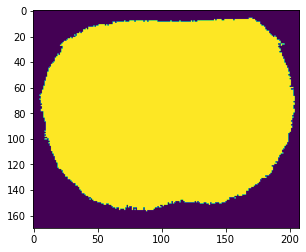

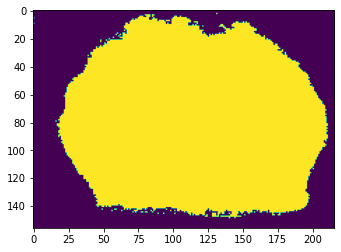

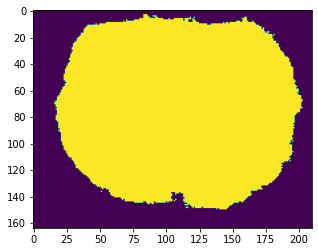

In [9]:
if __name__ == "__main__":
    files = [x for x in os.listdir(datadir) if "_recal.imzML" in x]
    for file in files:
        if file not in msis:
            msi = SIMSIToolBox.MSIData(mzs,ppm=ppmThresh,numCores = num_cores,intensityCutoff=intensityCutoff)
            msi.readimzML(datadir + file)
            msi.segmentImage(method=seg_method, num_latent=num_components, dm_method=dm_method,fill_holes = True)
            plt.close()
            plt.figure()
            plt.imshow(msi.imageBoundary)
            msi.smoothData(filtMethod,convSquare)
            msi.correctNaturalAbundance(peaklist["formula"].values,peaklist["inds"].values)
            msis[file] = msi



In [ ]:
#resegment
#if __name__ == "__main__":
#    file = "20221104_mt_tumor_brain4-3_13E_13C_20um_70-560mz Analyte 2_1_recal.imzML"
#    msi = SIMSIToolBox.MSIData(mzs,ppm=ppmThresh,numCores = num_cores,intensityCutoff=intensityCutoff)
#    msi.readimzML(datadir + file)
#    msi.segmentImage(method="TIC_manual",fill_holes = True,threshold=0.41e6)
#    plt.figure()
#    plt.imshow(msi.imageBoundary)
#    msi.smoothData(filtMethod,convSquare)
#    msi.correctNaturalAbundance(peaklist["formula"].values,peaklist["inds"].values)
#    msis[file] = msi



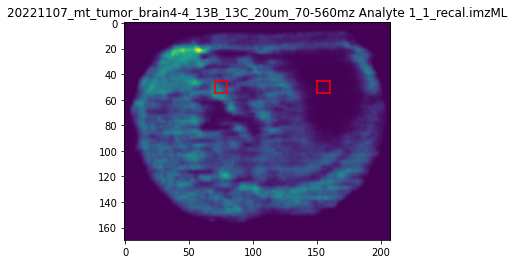

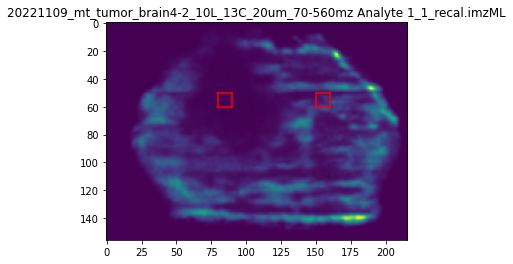

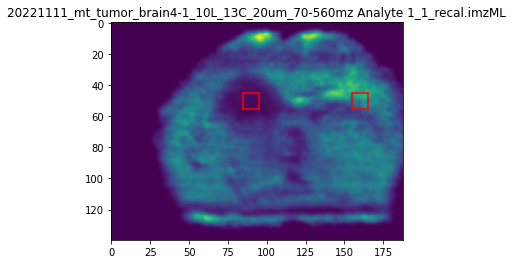

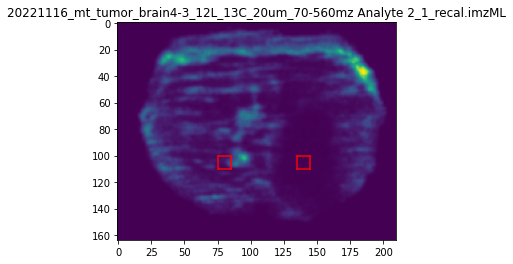

In [9]:
boxSize = 10
boxBoundaries = {'20221026_mt_tumor_brain4-1_11E_13C_10um_70-560mz Analyte 1_1_recal.imzML':{"i":[[60,60+boxSize],[45,45+boxSize]],"c":[[120,120+boxSize],[45,45+boxSize]]},
                        '20221028_mt_tumor_brain4-2_12B_13C_10um_70-560mz Analyte 1_1_recal.imzML':{"i":[[75,75+boxSize],[60,60+boxSize]],"c":[[140,140+boxSize],[60,60+boxSize]]},
                        "20221031_mt_tumor_brain4-4_13D_13C_10um_70-560mz Analyte 1_1_recal.imzML":{"i":[[160,160+boxSize],[70,70+boxSize]],"c":[[60,60+boxSize],[70,70+boxSize]]},
                        "20221102_mt_tumor_brain4-3_13D_13C_10um_70-560mz Analyte 1_1_recal.imzML":{"i":[[140,140+boxSize],[110,110+boxSize]],"c":[[50,50+boxSize],[110,110+boxSize]]},
                         "20221104_mt_tumor_brain4-3_13E_13C_20um_70-560mz Analyte 2_1_recal.imzML":{"i":[[150,150+boxSize],[90,90+boxSize]],"c":[[70,70+boxSize],[90,90+boxSize]]},
                         "20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML":{"i":[[150,150+boxSize],[45,45+boxSize]],"c":[[70,70+boxSize],[45,45+boxSize]]},             
                         "20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML":{"i":[[80,80+boxSize],[50,50+boxSize]],"c":[[150,150+boxSize],[50,50+boxSize]]},
                         "20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML":{"i":[[85,85+boxSize],[45,45+boxSize]],"c":[[155,155+boxSize],[45,45+boxSize]]},
                         "20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML":{"i":[[135,135+boxSize],[100,100+boxSize]],"c":[[75,75+boxSize],[100,100+boxSize]]}
                }
naaInds = [369, 370, 371, 372, 373, 374, 375]
def plotBox(xmin,xmax,ymin,ymax,color):
    plt.plot([xmin,xmax],[ymin,ymin],color)
    plt.plot([xmin,xmax],[ymax,ymax],color)
    plt.plot([xmin,xmin],[ymin,ymax],color)
    plt.plot([xmax,xmax],[ymin,ymax],color)
    
def addBox(xmin,xmax,ymin,ymax,color,image):
    image = deepcopy(image)
    image[xmin:xmax+1,ymin] = color
    image[xmin:xmax+1,ymax] = color
    image[xmin,ymin:ymax+1] = color
    image[xmax,ymin:ymax+1] = color
    return image

for fn in msis:
    plt.figure()
    plt.imshow(msis[fn].data_tensor[naaInds,:,:].sum(axis=0))
    plt.title(fn)    

    box1 = boxBoundaries[fn]["i"]
    box2 = boxBoundaries[fn]["c"]

    plotBox(*box1[0],*box1[1],"red")
    plotBox(*box2[0],*box2[1],"red")


In [10]:
molsOfInterest = ["C16H32O2","C18H36O2"]

In [11]:
def getMeanValueFromBox(arr,xmin,xmax,ymin,ymax):
    roi = []
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            roi.append(arr[x,y])
    roi = np.array(roi)
    return np.mean(roi)

Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 


palmitate_g  palmitate_x0  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...     0.159207      0.338186   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...     0.145145      0.373213   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...     0.129311      0.354553   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...     0.125525      0.314133   

                                                    palmitate_x1  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...      0.082320   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...      0.083658   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...      0.077930   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...      0.079174   

                                                    palmitate_x2  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...      0.579494   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...      0.543036   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...      0.567517   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...      0.606601   

                                                    palmitate_g_lh  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...        0.225758   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...        0.211217   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...        0.184065   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...        0.200562   

                                                    palmitate_x0_lh  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...         0.364264   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...         0.365714   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...         0.361526   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...         0.341119   

                                                    palmitate_x1_lh  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...         0.082506   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...         0.086775   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...         0.079124   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...         0.083984   

                                                    palmitate_x2_lh  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...         0.553230   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...         0.547511   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...         0.559350   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...         0.574897   

                                                    palmitate_g_rh  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...        0.153134   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...        0.105364   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...        0.114863   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...        0.066796   

                                                    palmitate_x0_rh  ...  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...         0.288078  ...   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...         0.340092  ...   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...         0.334800  ...   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...         0.325430  ...   

                                                    stearate_g_lh  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...       0.170851   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...       0.135215   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...       0.092406   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...       0.115024   

                                                    stearate_e_lh  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...       0.081894   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...       0.106707   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...       0.062001   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...       0.070752   

                                                    stearate_x0_lh  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m... 

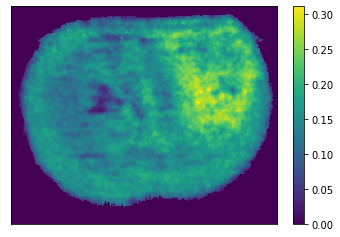

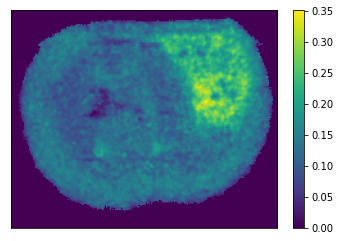

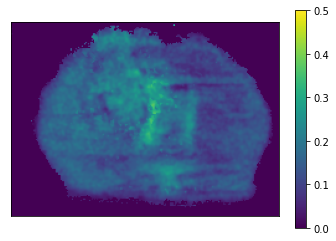

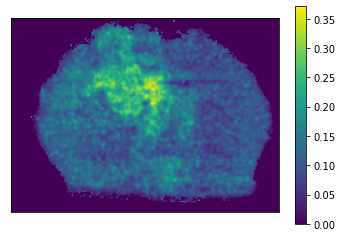

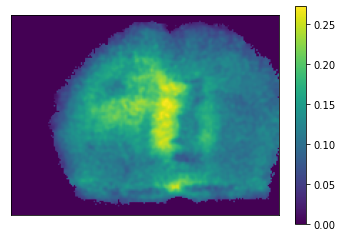

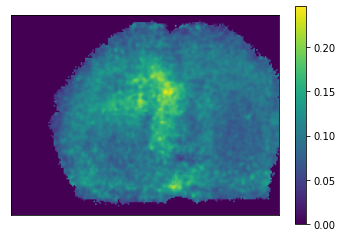

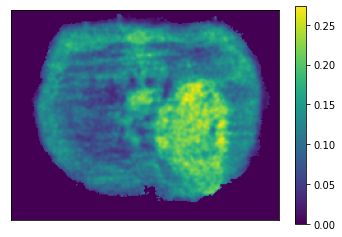

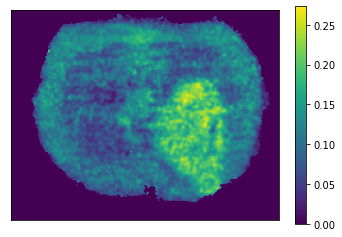

In [12]:
for fn in msis:
    try: os.mkdir(datadir + fn.replace(".imzML",""))
    except: pass
    
badIndsPal = [1,4,5]
badIndsSt = [17]

peaklistFilt = peaklist[peaklist["formula"].isin(molsOfInterest)]
peaklistFilt = peaklistFilt.sort_values(by="mz",ascending=True)

fluxImages = {}
meanFluxes = {}

if __name__ == "__main__":
    for fn in msis:
        fluxImages[fn] = {}
        meanFluxes[fn] = {}

        palmInd = peaklistFilt.index.values[0]
        stInd = peaklistFilt.index.values[1]

        shape = msis[fn].tic_image.shape
        
        origTensor = deepcopy(msis[fn].data_tensor)

        msis[fn].data_tensor[np.array(peaklistFilt.at[palmInd,"inds"])[badIndsPal]] = np.zeros((len(badIndsPal),shape[0],shape[1]))
        msis[fn].data_tensor[np.array(peaklistFilt.at[stInd,"inds"])[badIndsSt]] = np.zeros((len(badIndsSt),shape[0],shape[1]))

        fluxImageG,fluxImageE,fluxImageD,fluxImageT0,fluxImageT1,fluxImageT2,T_founds,P_trues,P_preds,numFounds,errs,errors = msis[fn].runISA(inds=peaklistFilt.at[palmInd,"inds"],minIso=0,minFrac=0.0,NACorrected=True,)            
        plt.figure()
        SIMSIToolBox.showImage(fluxImageG,cmap=colormap) 
        
        box1 = boxBoundaries[fn]["i"]
        box2 = boxBoundaries[fn]["c"]
        
        
        meanFluxes[fn]["palmitate_g"] = np.mean(fluxImageG[msis[fn].imageBoundary > 0.5])
        meanFluxes[fn]["palmitate_x0"] = np.mean(fluxImageT0[msis[fn].imageBoundary > 0.5])
        meanFluxes[fn]["palmitate_x1"] = np.mean(fluxImageT1[msis[fn].imageBoundary > 0.5])
        meanFluxes[fn]["palmitate_x2"] = np.mean(fluxImageT2[msis[fn].imageBoundary > 0.5])

        meanFluxes[fn]["palmitate_g_lh"] = getMeanValueFromBox(fluxImageG,*box1[1],*box1[0])
        meanFluxes[fn]["palmitate_x0_lh"] = getMeanValueFromBox(fluxImageT0,*box1[1],*box1[0])
        meanFluxes[fn]["palmitate_x1_lh"] = getMeanValueFromBox(fluxImageT1,*box1[1],*box1[0])
        meanFluxes[fn]["palmitate_x2_lh"] = getMeanValueFromBox(fluxImageT2,*box1[1],*box1[0])

        meanFluxes[fn]["palmitate_g_rh"] = getMeanValueFromBox(fluxImageG,*box2[1],*box2[0])
        meanFluxes[fn]["palmitate_x0_rh"] = getMeanValueFromBox(fluxImageT0,*box2[1],*box2[0])
        meanFluxes[fn]["palmitate_x1_rh"] = getMeanValueFromBox(fluxImageT1,*box2[1],*box2[0])
        meanFluxes[fn]["palmitate_x2_rh"] = getMeanValueFromBox(fluxImageT2,*box2[1],*box2[0])

        fluxImages[fn]["palmitate"] = {"g":fluxImageG,"e":fluxImageE,"d":fluxImageD,"x0":fluxImageT0,"x1":fluxImageT1,"x2":fluxImageT2,"errs":errs}

        fluxImageST,fluxImageE,fluxImageD,fluxImageT0,fluxImageT1,fluxImageT2,T_founds,P_trues,P_preds,numFounds,errs,errors = msis[fn].runISA(isaModel="elongation",inds=peaklistFilt.at[stInd,"inds"],minIso=0,minFrac=0.00,NACorrected=True)
        fluxImages[fn]["stearate"] = {"g":fluxImageST,"e":fluxImageE,"g+e":fluxImageST+fluxImageE,"d":fluxImageD,"x0":fluxImageT0,"x1":fluxImageT1,"x2":fluxImageT2,"errs":errs}

        plt.figure()
        SIMSIToolBox.showImage(fluxImageST + fluxImageE,cmap=colormap)
        
        meanFluxes[fn]["stearate_g"] = np.mean(fluxImageST[msis[fn].imageBoundary > 0.5])
        meanFluxes[fn]["stearate_e"] = np.mean(fluxImageE[msis[fn].imageBoundary > 0.5])
        meanFluxes[fn]["stearate_x0"] = np.mean(fluxImageT0[msis[fn].imageBoundary > 0.5])
        meanFluxes[fn]["stearate_x1"] = np.mean(fluxImageT1[msis[fn].imageBoundary > 0.5])
        meanFluxes[fn]["stearate_x2"] = np.mean(fluxImageT2[msis[fn].imageBoundary > 0.5])

        meanFluxes[fn]["stearate_g_lh"] = getMeanValueFromBox(fluxImageST,*box1[1],*box1[0])
        meanFluxes[fn]["stearate_e_lh"] = getMeanValueFromBox(fluxImageE,*box1[1],*box1[0])
        meanFluxes[fn]["stearate_x0_lh"] = getMeanValueFromBox(fluxImageT0,*box1[1],*box1[0])
        meanFluxes[fn]["stearate_x1_lh"] = getMeanValueFromBox(fluxImageT1,*box1[1],*box1[0])
        meanFluxes[fn]["stearate_x2_lh"] = getMeanValueFromBox(fluxImageT2,*box1[1],*box1[0])

        meanFluxes[fn]["stearate_g_rh"] = getMeanValueFromBox(fluxImageST,*box2[1],*box2[0])
        meanFluxes[fn]["stearate_e_rh"] = getMeanValueFromBox(fluxImageE,*box2[1],*box2[0])
        meanFluxes[fn]["stearate_x0_rh"] = getMeanValueFromBox(fluxImageT0,*box2[1],*box2[0])
        meanFluxes[fn]["stearate_x1_rh"] = getMeanValueFromBox(fluxImageT1,*box2[1],*box2[0])
        meanFluxes[fn]["stearate_x2_rh"] = getMeanValueFromBox(fluxImageT2,*box2[1],*box2[0])

        msis[fn].data_tensor = origTensor

    meanFluxes = pd.DataFrame.from_dict(meanFluxes,orient="index")
meanFluxes

In [13]:
meanFluxes.to_csv(datadir + "average_fluxes.csv")

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


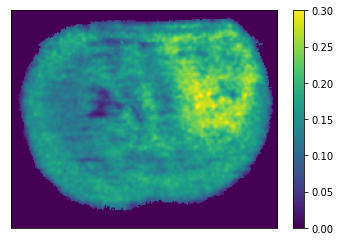

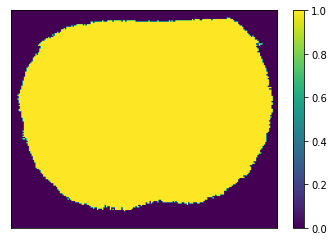

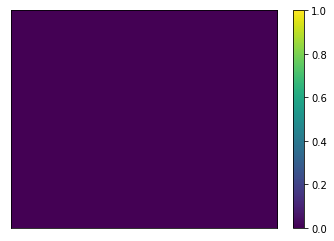

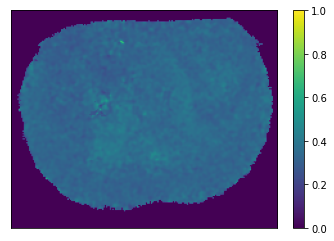

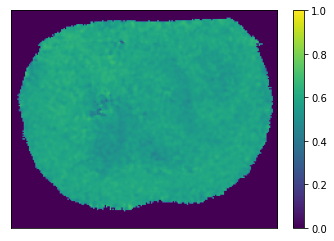

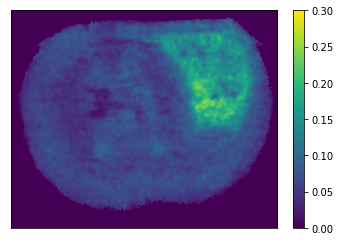

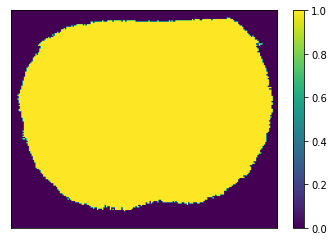

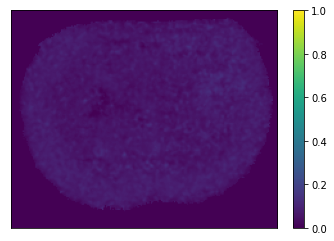

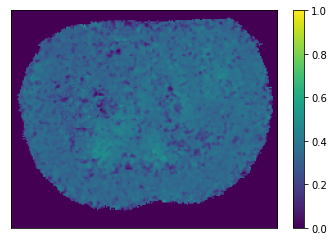

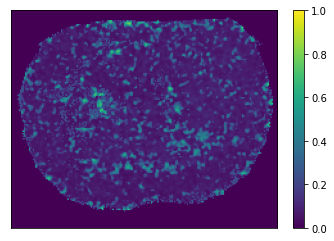

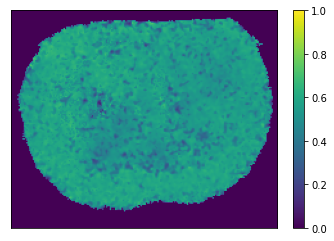

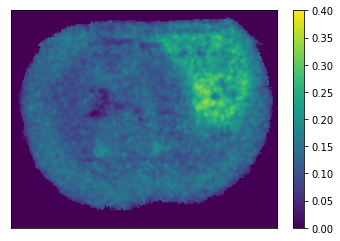

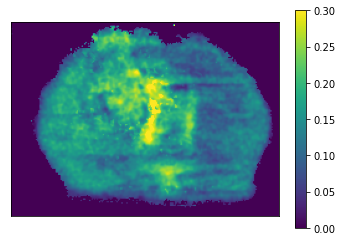

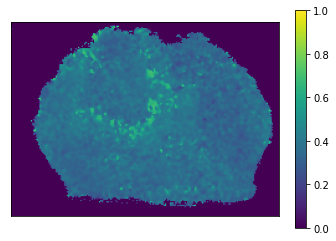

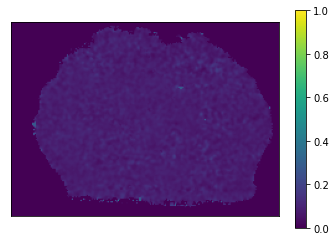

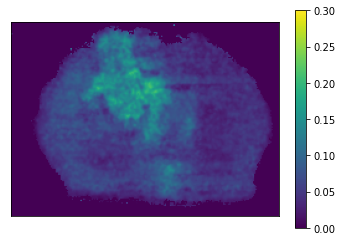

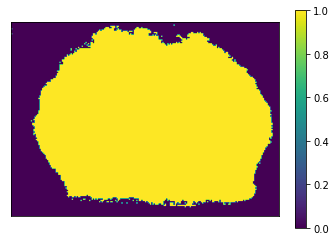

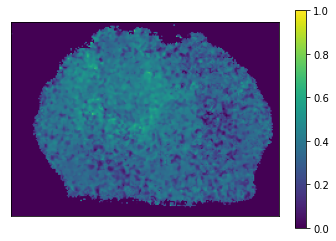

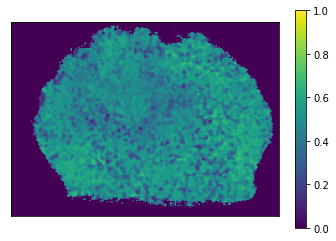

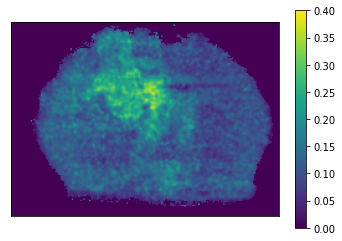

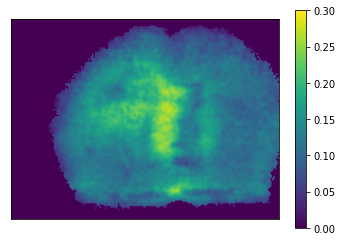

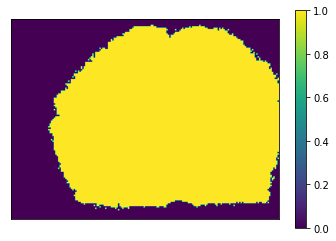

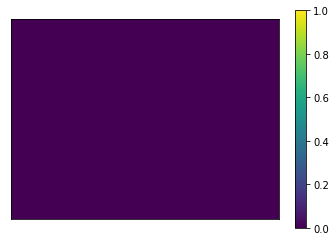

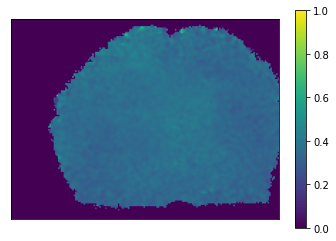

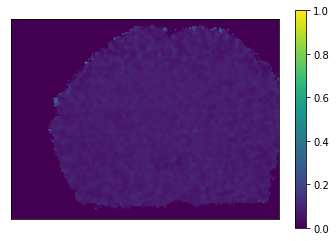

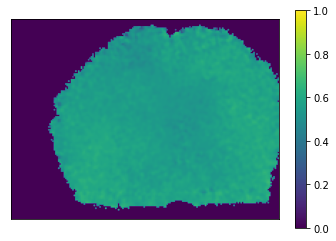

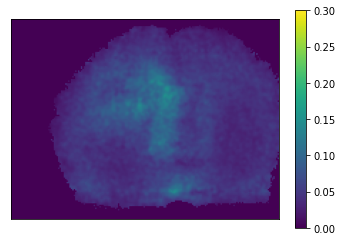

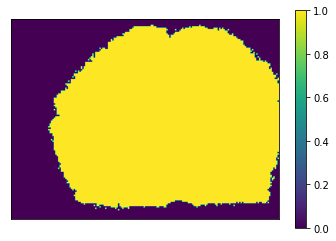

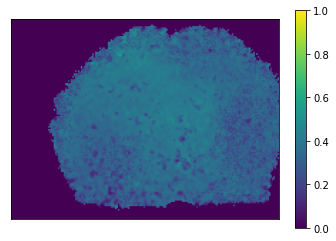

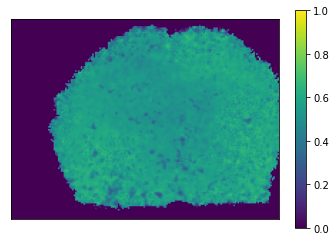

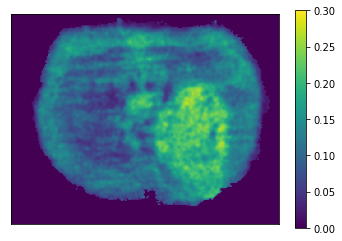

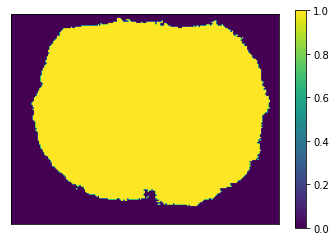

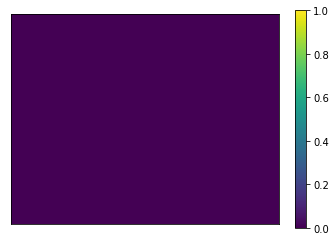

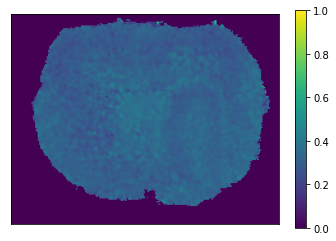

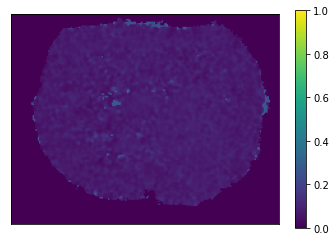

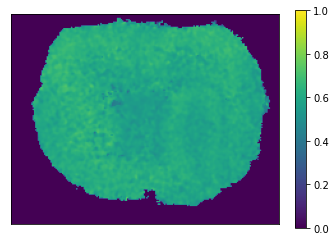

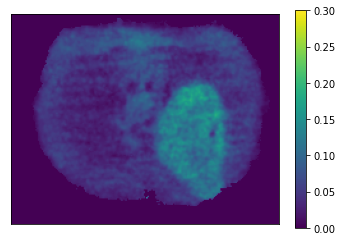

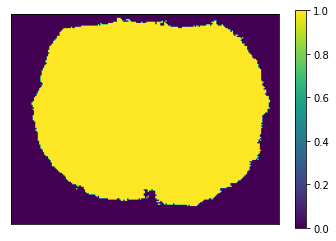

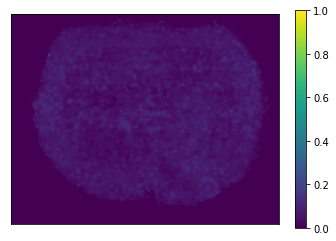

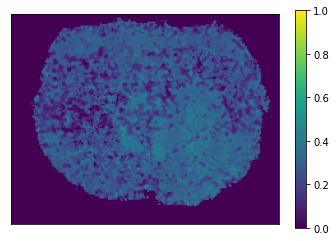

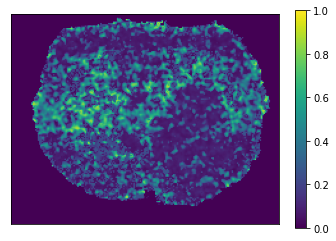

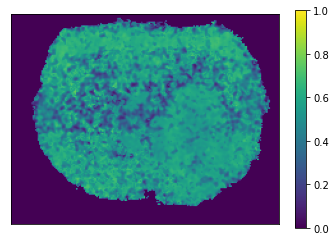

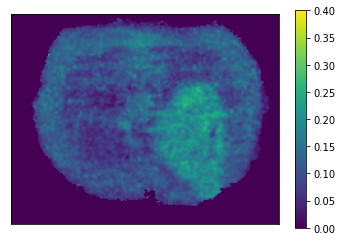

In [14]:
maxLims = {"g":0.3,"d":1.0,"e":1.0,"x0":1.0,"x1":1.0,"x2":1.0,"g+e":.4}
for fn in fluxImages:
    for mol in fluxImages[fn]:
        for val in ["g","d","e","x0","x1","x2","g+e"]:
            if val in fluxImages[fn][mol]:
                img = fluxImages[fn][mol][val]
                plt.figure()
                SIMSIToolBox.showImage(img,cmap = colormap)
                maxLim = maxLims[val]#np.max(img)
                plt.clim(0,maxLim)
                norm = plt.Normalize(vmin=0, vmax=maxLim)
                norm = colormap(norm(img))
                for row in range(norm.shape[0]):
                    for col in range(norm.shape[1]):
                        if msis[fn].imageBoundary[row,col] < .5:
                            norm[row,col,3] = 0
                plt.imsave(datadir + fn.replace(".imzML","/") + mol + "_" + val + ".png",norm)#,cmap=colormap)
                plt.savefig(datadir + fn.replace(".imzML","/") + mol + "_" + val + "_with_colorbar.png")
                

In [15]:
def extractLabelingPattern(data,xmin,xmax,ymin,ymax,badInds=[]):
    roi = []
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            roi.append(data[:,x,y])
    roi = np.array(roi)
    
    df  = {}
    aveLabelings = []
    for row in roi:
        for b in badInds:
            row[b] = 0.0
        aveLabelings.append(np.sum([x*row[x] for x in range(len(row))]) / len(row) * np.sum([row[x] for x in range(len(row))]))
        row = row / np.sum(row)
        for x in range(len(row)):
           df[len(df)] = {"isotopologue":"M"+str(x),"Isotopologue Fraction":row[x]}

    df = pd.DataFrame.from_dict(df,orient="index")
    print(np.mean(aveLabelings),np.std(aveLabelings))
    return df

def extractLabelingPatternForStacked(data,xmin,xmax,ymin,ymax):

    roi = []
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            roi.append(data[:,x,y])
    roi = np.array(roi)
    
    roi = roi.mean(axis=0)
    
    df  = {}
    for x in range(len(roi)):
       df[len(df)] = {"isotopologue":"M"+str(x),"Isotopologue Fraction":roi[x]}

    df = pd.DataFrame.from_dict(df,orient="index")
    
    df = df.set_index("isotopologue")

    return df

10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C16H32O2 20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.11433657967736377 0.009970175204714155
C16H32O2 20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.08615986762061545 0.01174982034527851
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C16H32O2 20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.09686023698717086 0.00834013959114344
C16H32O2 20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.05057549378849139 0.011706909061292452
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C16H32O2 20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.09220769170271292 0.005059340225245376
C16H32O2 20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.05968968013834357 0.0035261950175181586
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C16H32O2 20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML ips
0.10628455119187098 0.009826821235000935


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


C16H32O2 20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML cont
0.037203989225151814 0.008988791842423988
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C10H14N5O7P 20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.4879863349261354 0.029814498834132532
C10H14N5O7P 20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.23869579252816406 0.02525662166605724
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C10H14N5O7P 20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.4124046868796311 0.044052711715183664
C10H14N5O7P 20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.2576470138657398 0.03196685708883486
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C10H14N5O7P 20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.43391328555235326 0.015840028250498888
C10H14N5O7P 20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.2328804789271232 0.007810278979226354
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C10H14N5O7P 20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML ips
0.5017635724507274 0.038035555586097516
C10H14N5O7P 20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML cont
0.31989719247079296 0.05920353990870174
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C18H36O2 20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.0937044828555222 0.0075043928062752206
C18H36O2 20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.04426434769130443 0.0053542449538577985
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C18H36O2 20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.0736908312944247 0.006299555397774009
C18H36O2 20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.025701970490486035 0.005708090210459293
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C18H36O2 20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.05272822579614635 0.0047581379282508685
C18H36O2 20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.028787606185819003 0.00174651217094022
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C18H36O2 20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML ips
0.06532853614987051 0.008766339816906736
C18H36O2 20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML cont
0.016960272257189022 0.003635703144756499
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C6H9NO5 20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.41802728142442896 0.07660756608709973
C6H9NO5 20221107_mt_tumor_brain4-4_13B_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.5180547430192581 0.01861457673170947
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C6H9NO5 20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.4345577976178191 0.08389838861847491
C6H9NO5 20221109_mt_tumor_brain4-2_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.4693912139083009 0.020651235847017925
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C6H9NO5 20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML ips
0.5067387728601829 0.03686238641493274
C6H9NO5 20221111_mt_tumor_brain4-1_10L_13C_20um_70-560mz Analyte 1_1_recal.imzML cont
0.5439468431776566 0.016288323325566716
10


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


C6H9NO5 20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML ips
0.2911605203598384 0.1305694801296784
C6H9NO5 20221116_mt_tumor_brain4-3_12L_13C_20um_70-560mz Analyte 2_1_recal.imzML cont
0.5401886217922256 0.024344051375584923


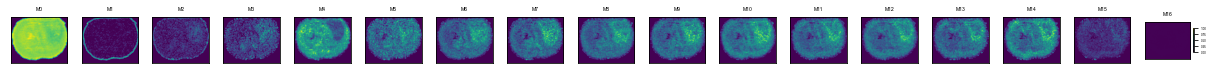

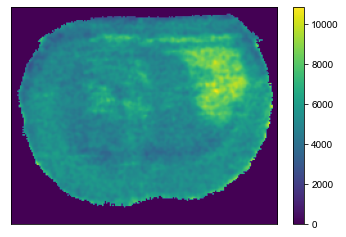

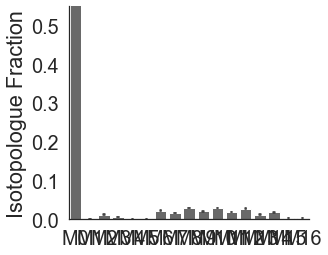

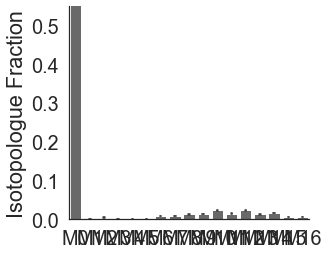

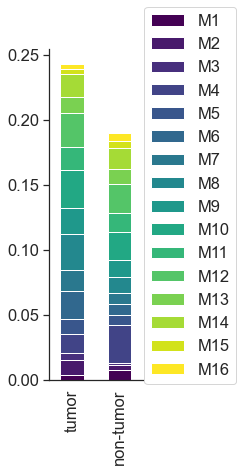

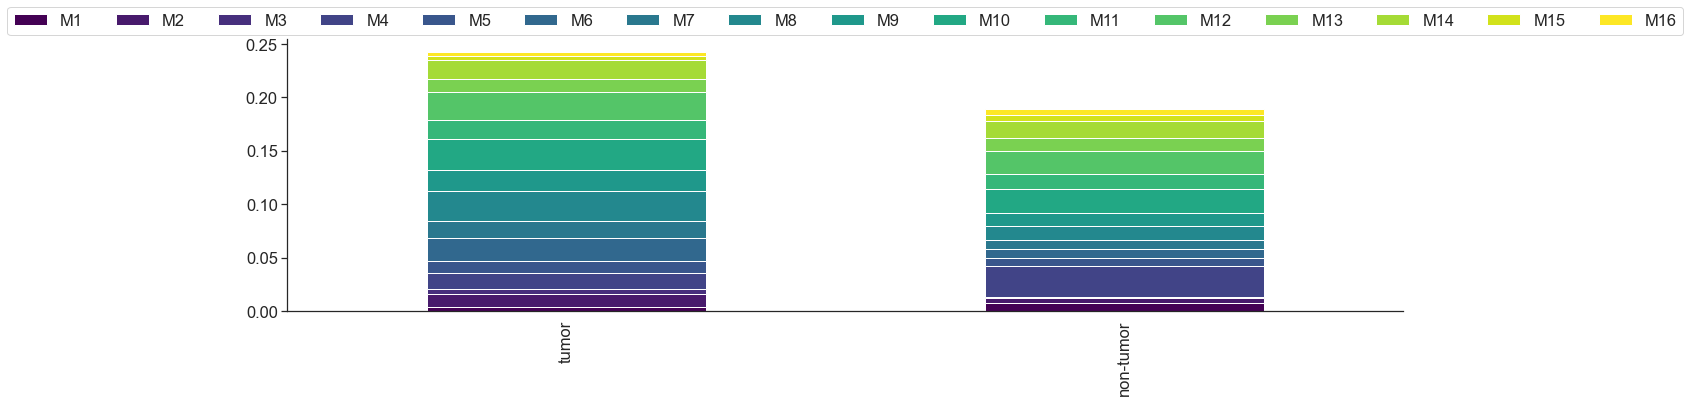

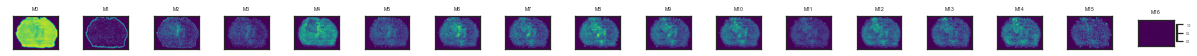

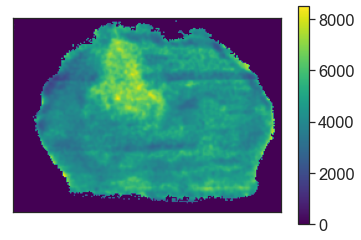

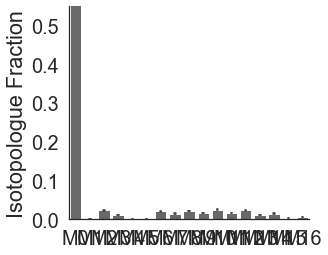

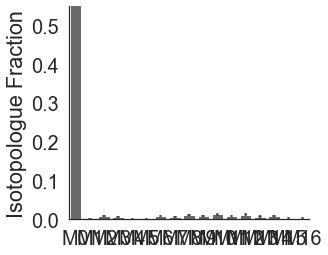

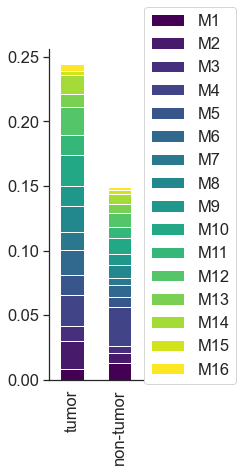

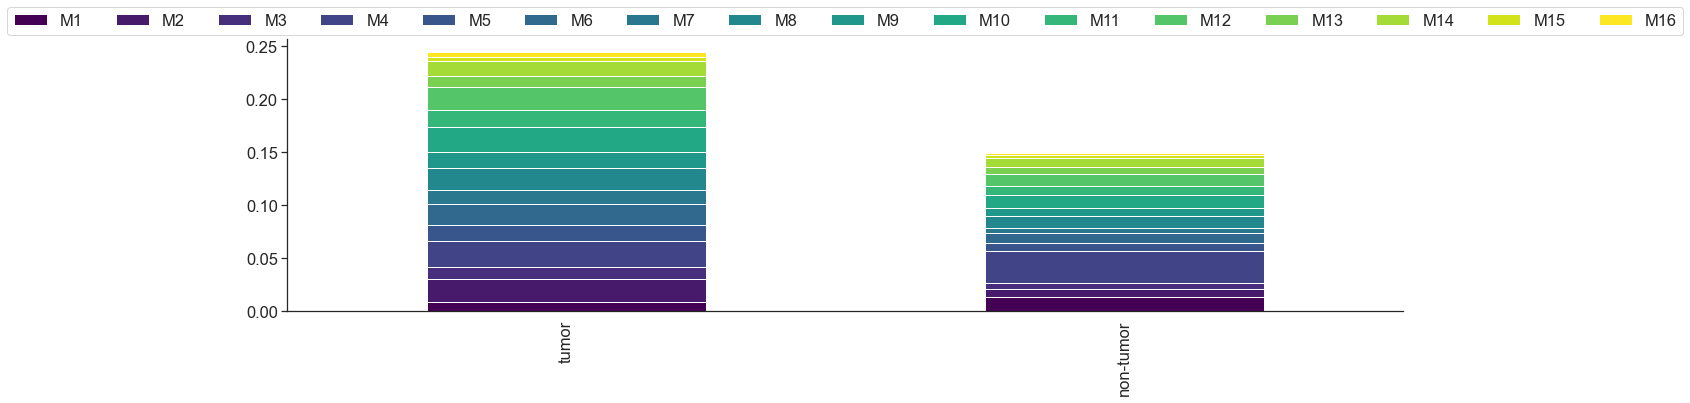

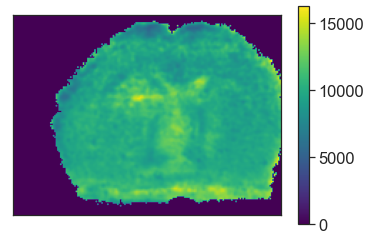

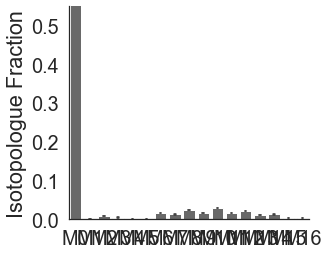

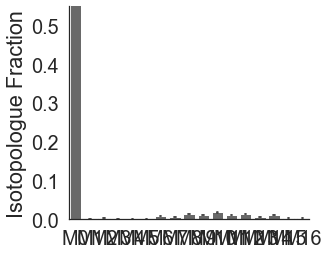

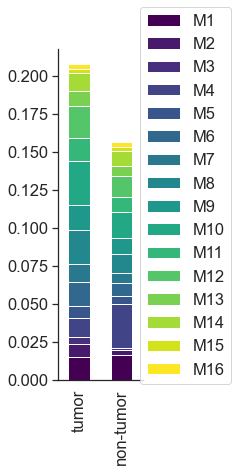

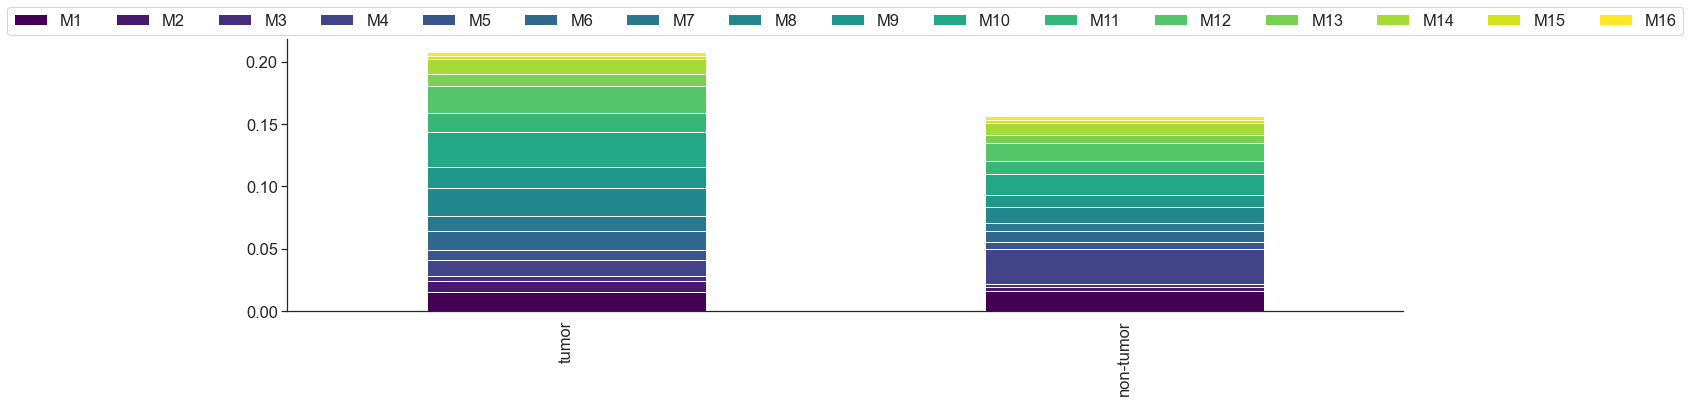

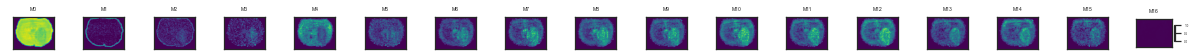

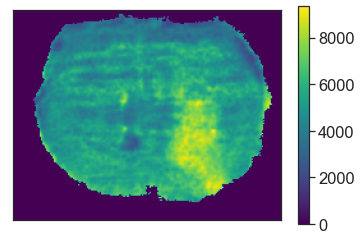

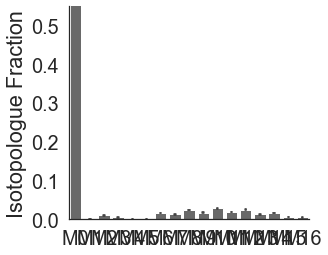

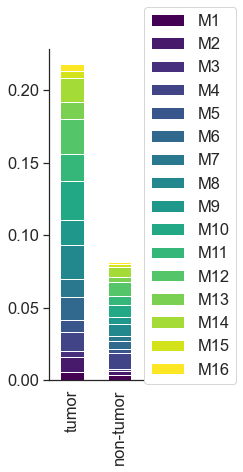

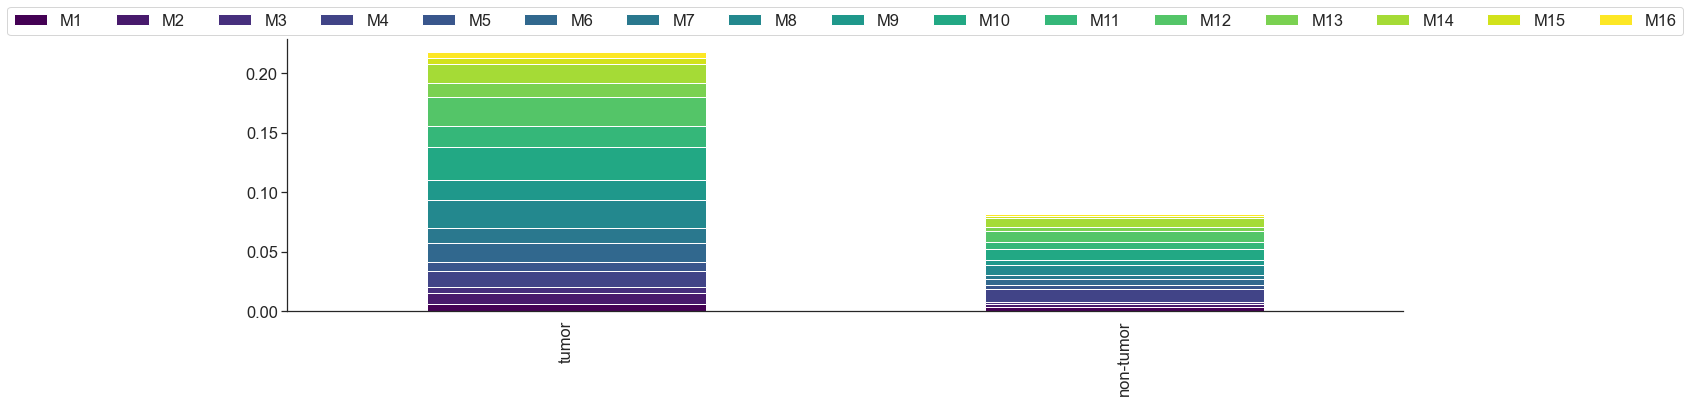

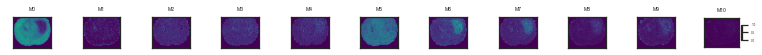

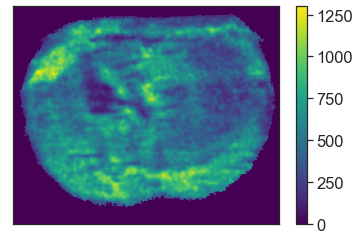

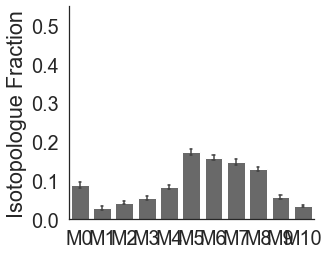

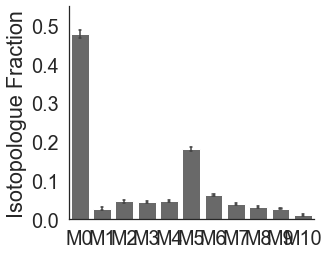

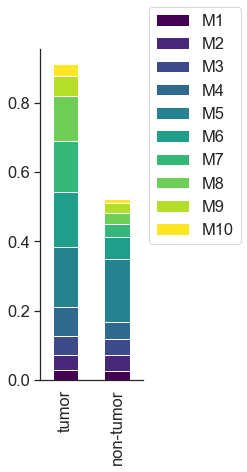

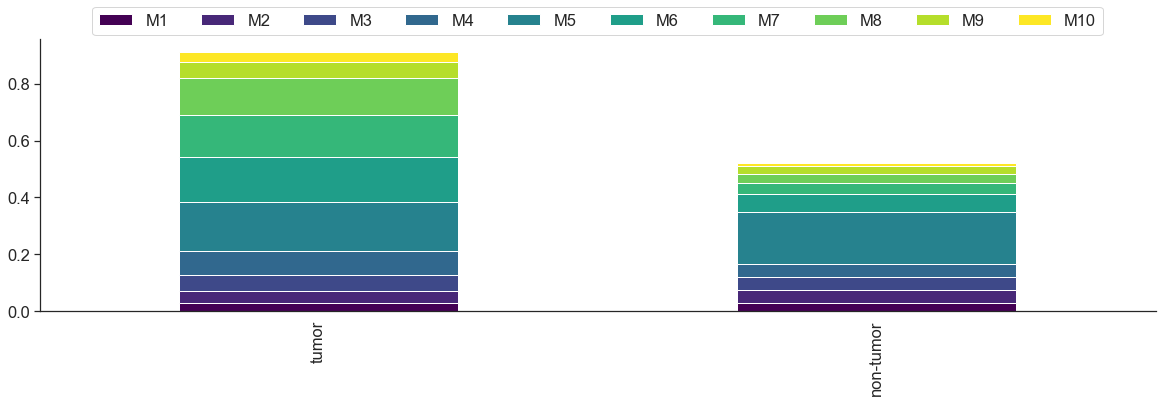

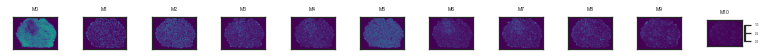

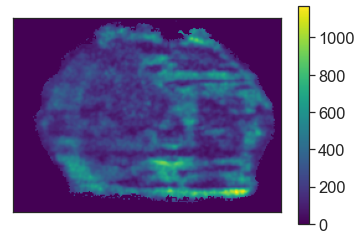

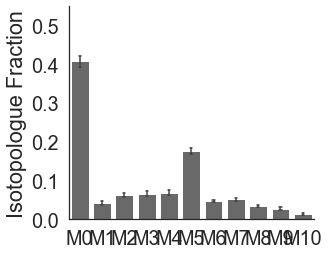

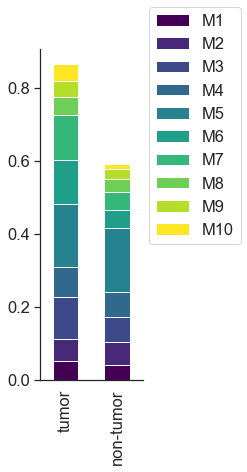

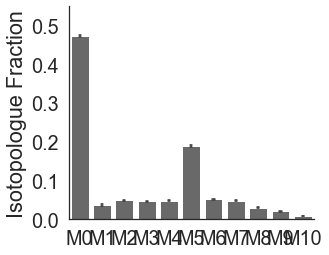

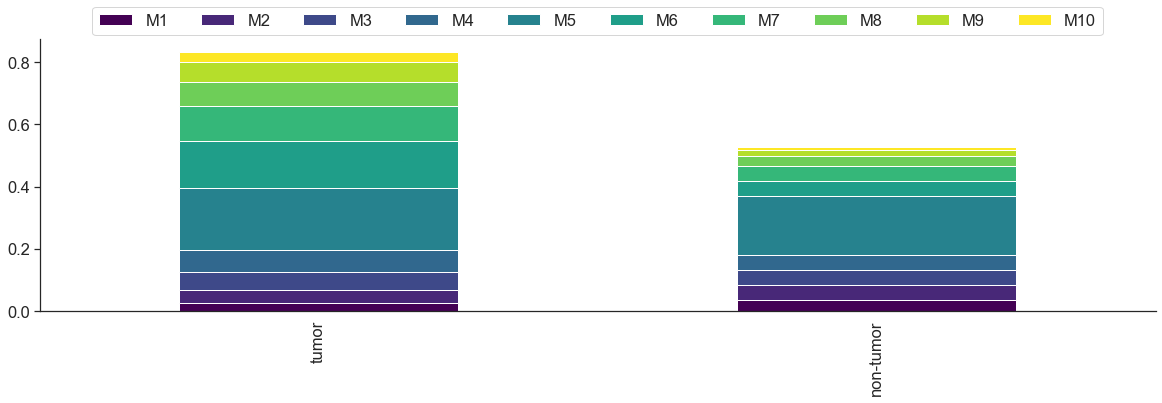

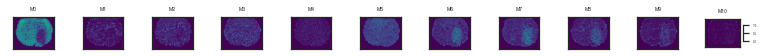

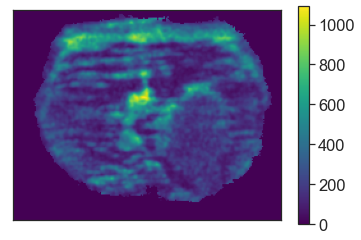

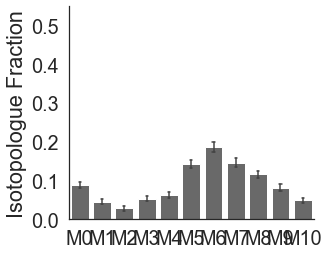

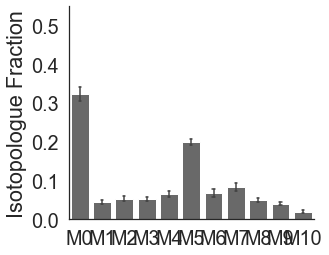

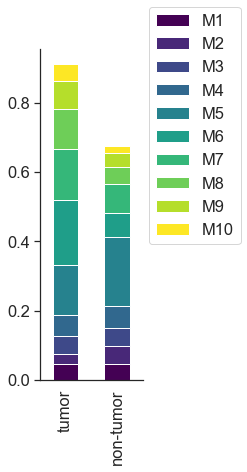

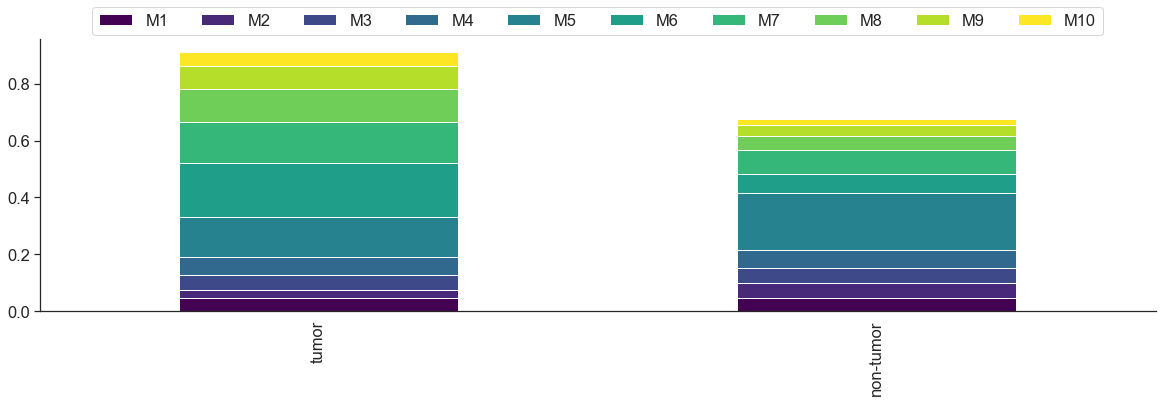

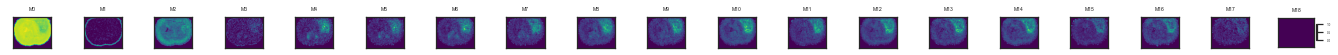

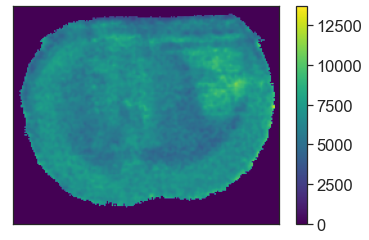

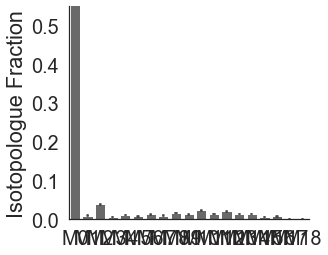

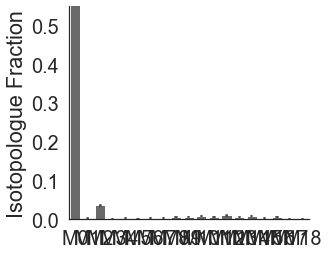

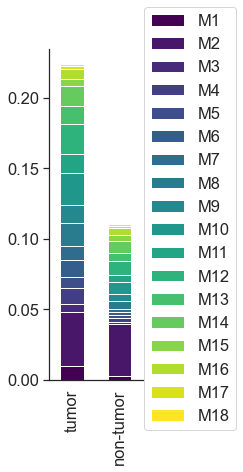

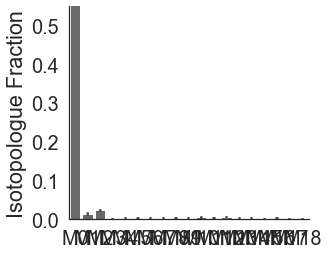

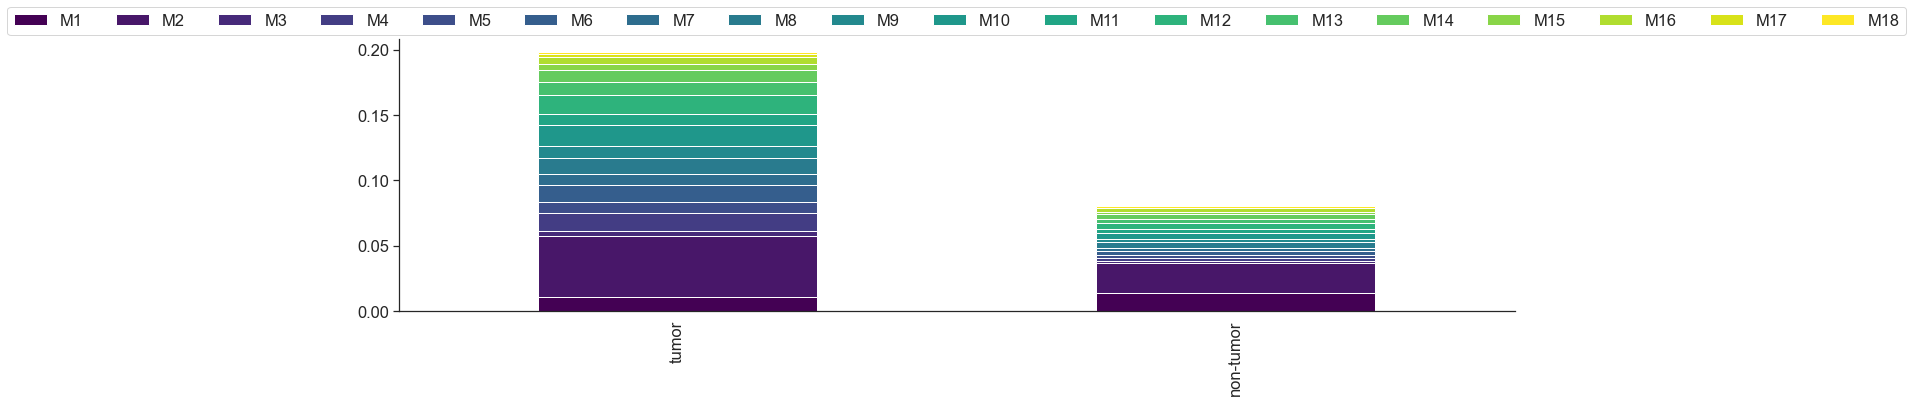

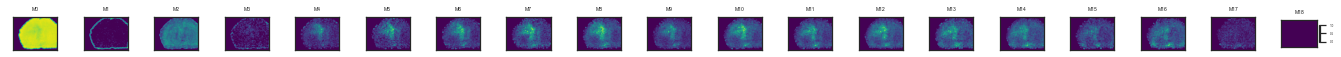

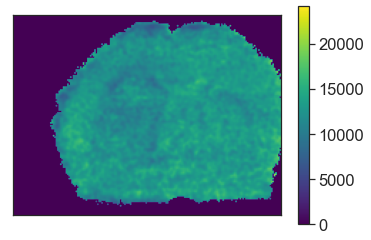

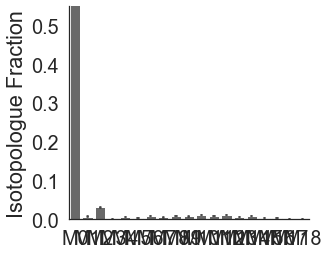

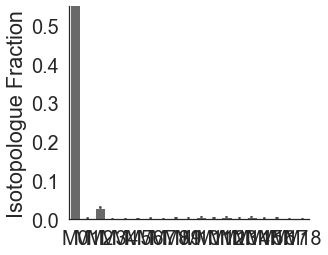

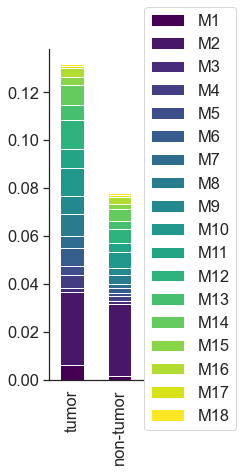

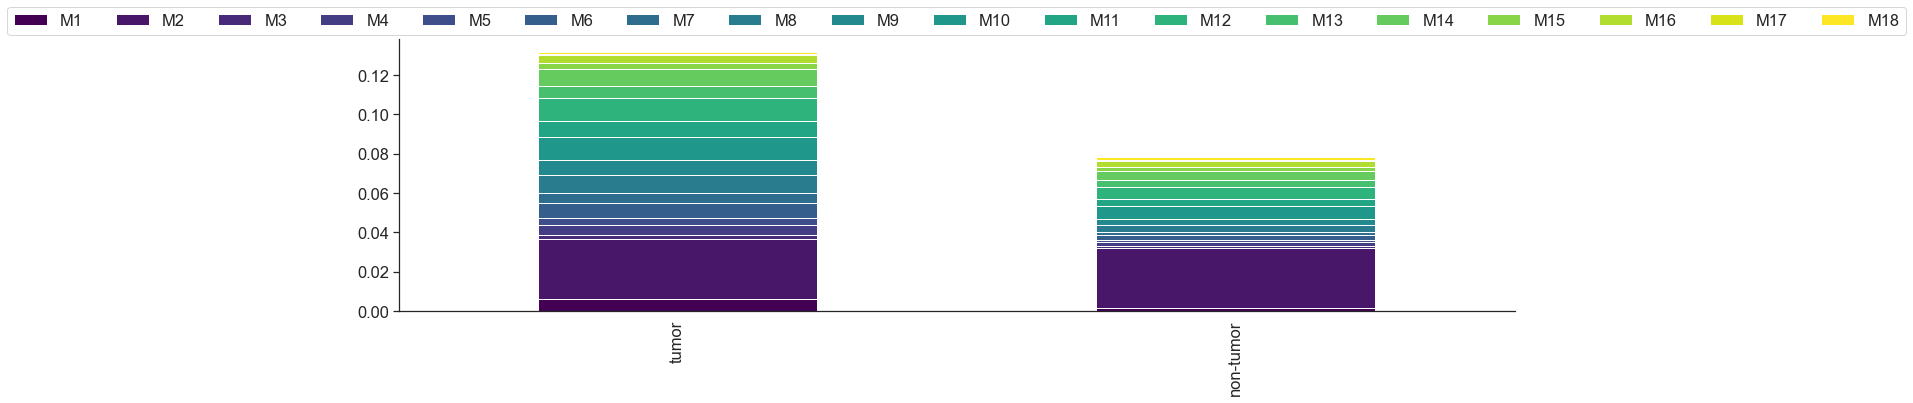

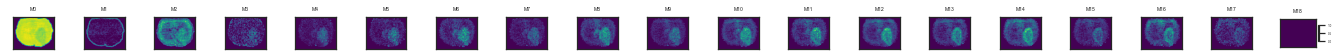

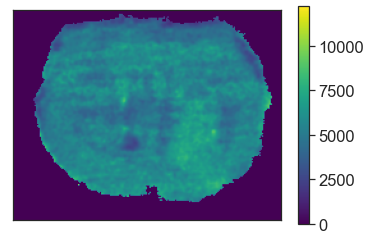

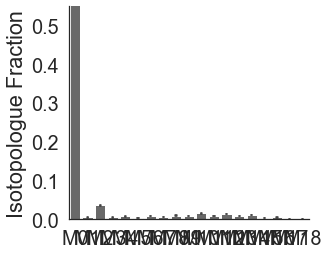

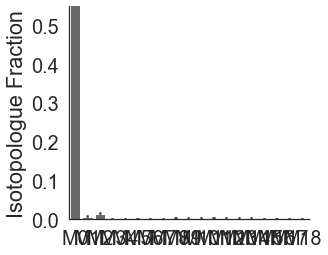

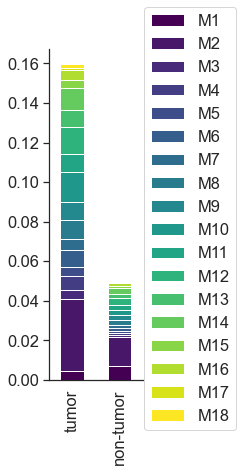

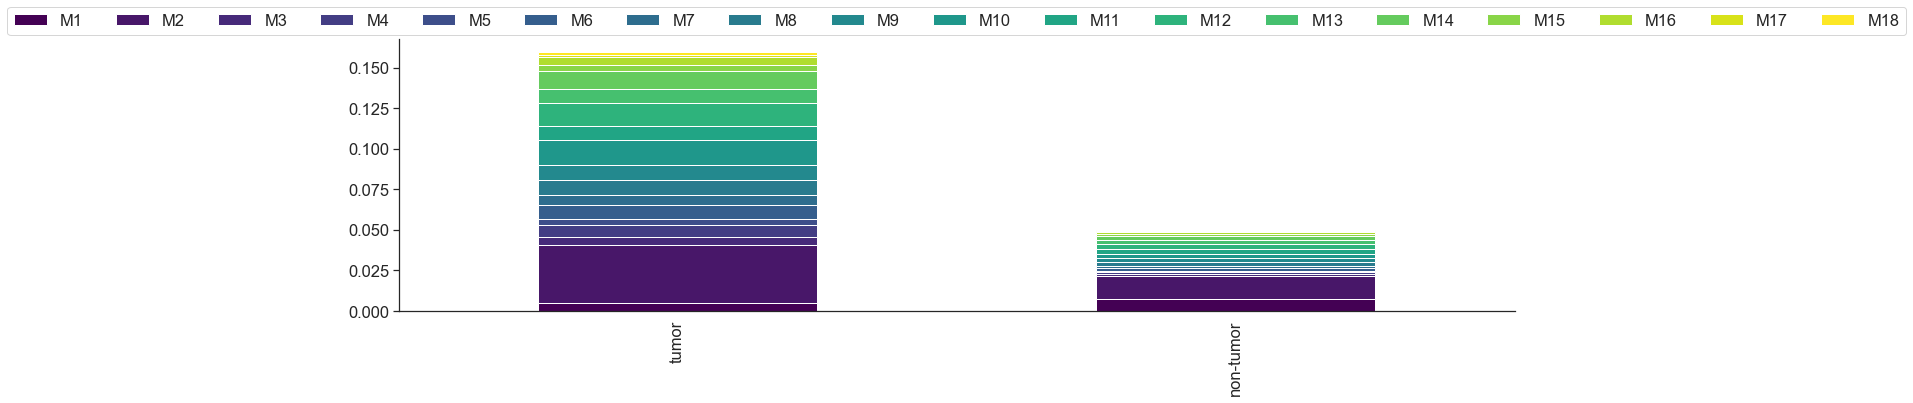

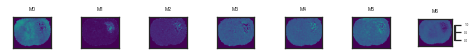

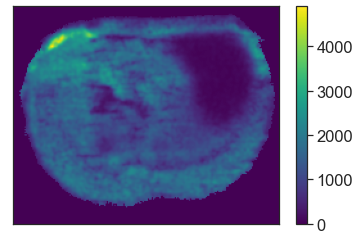

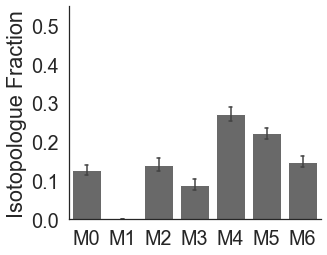

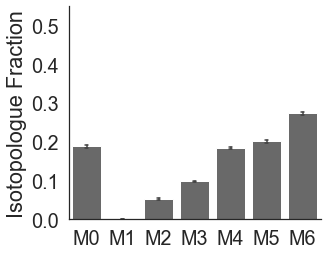

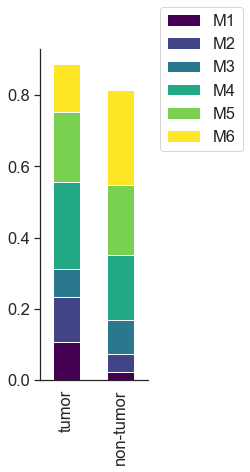

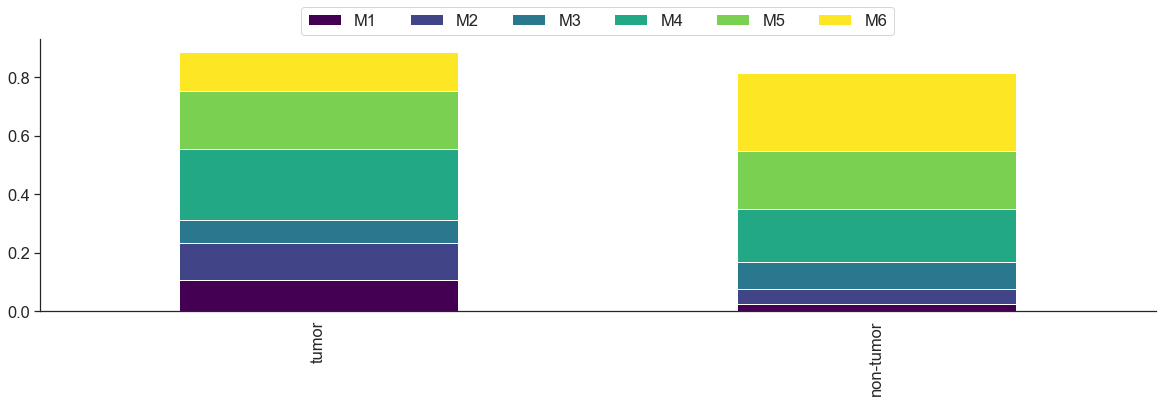

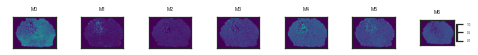

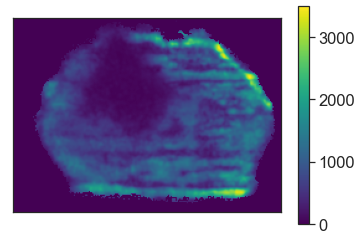

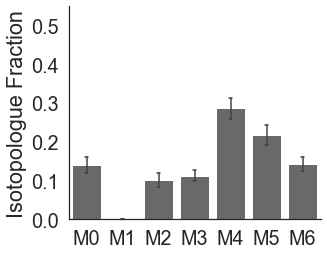

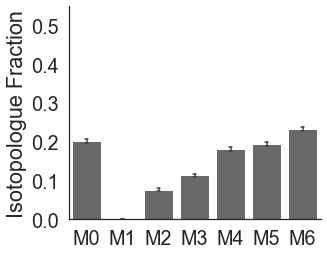

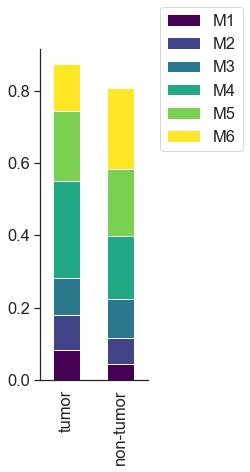

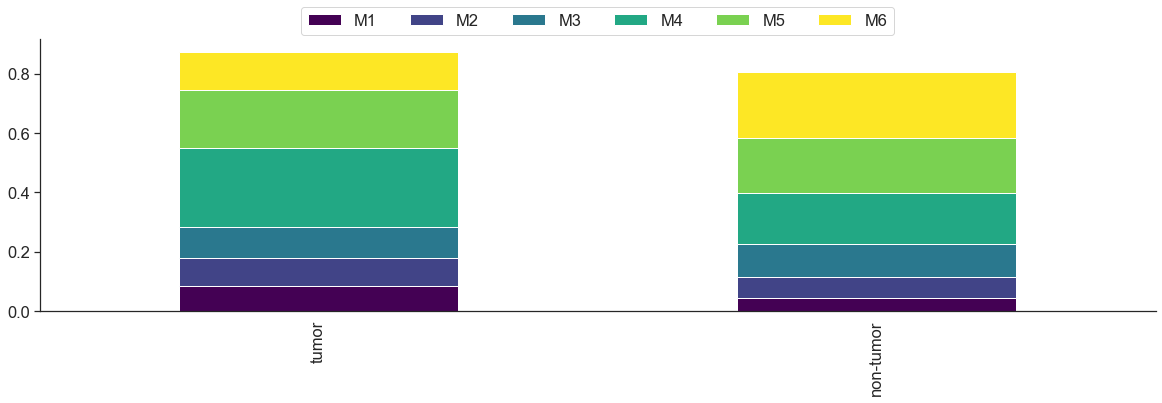

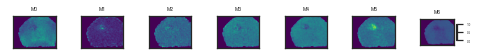

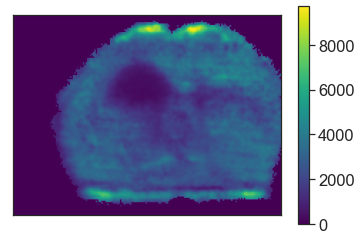

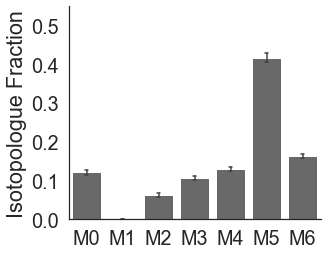

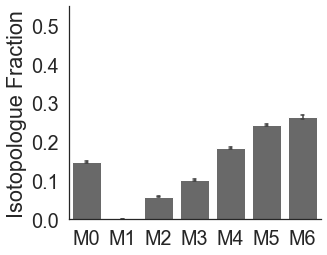

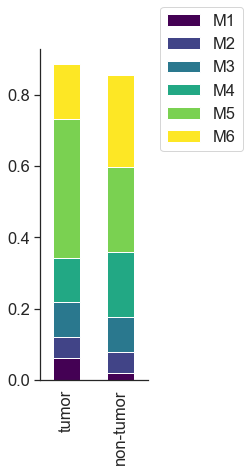

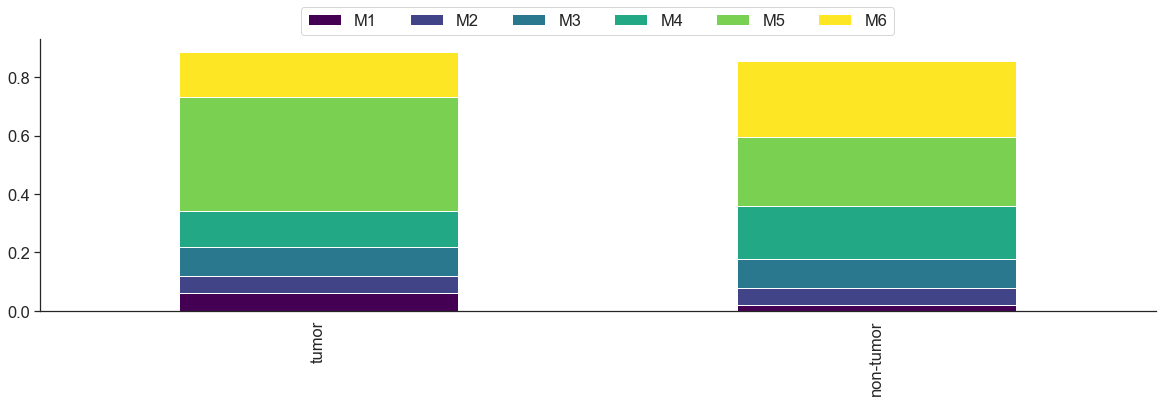

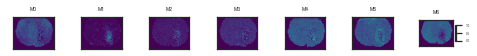

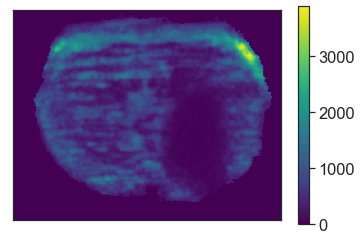

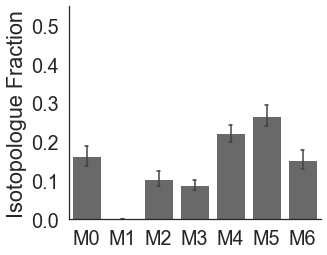

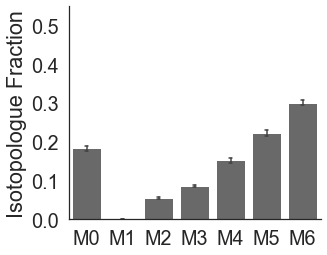

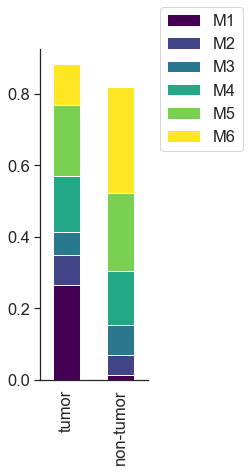

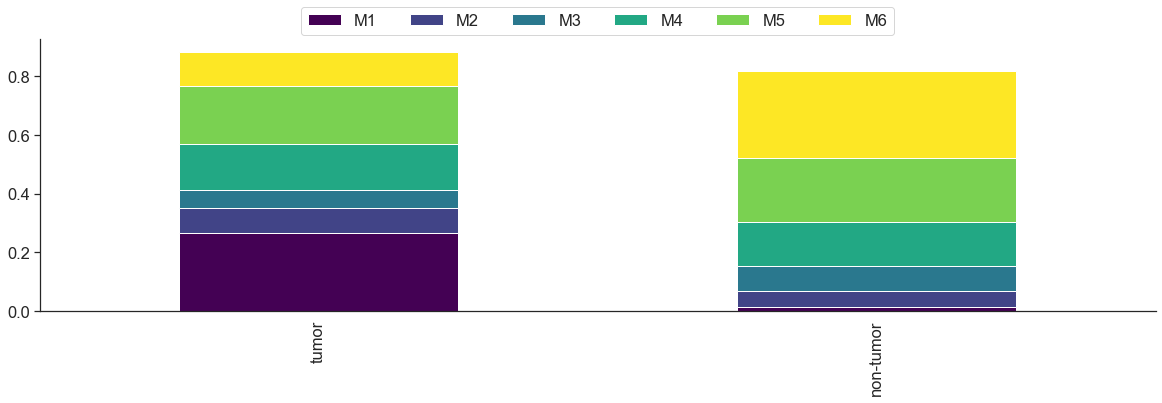

In [16]:
averageLabeling = {fn:{} for fn in msis}
maxLabs = {"C16H32O2":[1.0 for x in range(2)] + [0.1 for x in range(15)],
           "C18H36O2":[1.0 for x in range(2)] + [0.1 for x in range(17)],
           "C6H9NO5":[1.0 for x in range(7)],
           "C10H14N5O7P":[1.0 for x in range(6)] + [0.2 for x in range(5)]}
badInds = {"C16H32O2":[1,4,5],
       "C18H36O2":[17],
       "C6H9NO5":[1],
       "C10H14N5O7P":[]}
for index,row2 in peaklist.iterrows():
    if row2["for_paper"] > 0.5:
        inds = row2["inds"]
        for fn in msis:
            print(msis[fn].ppm)
            
            tmpLab = {}
            
            fig, axes = plt.subplots(1,len(inds),figsize=(len(inds),1))
            tmp = msis[fn].data_tensor[inds]
            isoTensor = SIMSIToolBox.normalizeTensor(tmp)
            col = 0
            for img in isoTensor:
                tmp = axes[col].imshow(img,cmap=colormap)
                ave = np.mean(img[msis[fn].imageBoundary > 0.5])
                tmpLab[row2["formula"] + "_M" + str(col)] = ave
                axes[col].set_xticks([])
                axes[col].set_yticks([])
                axes[col].set_title("M"+str(col),fontsize=5)
                if col == len(isoTensor) - 1:
                    cbar = plt.colorbar(tmp, ax=axes[col],shrink=0.5)
                    tmp.set_clim(0.0,1.0)
                    cbar.ax.tick_params(labelsize=3)
                col += 1
            
            plt.tight_layout()
            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_iso_all.png")

            tmp = msis[fn].data_tensor[inds]
            isoTensor = SIMSIToolBox.normalizeTensor(tmp)
            maxLim = 1.0
            counter = 0
            for img in isoTensor:
                norm = plt.Normalize(vmin=0, vmax=maxLabs[row2["formula"]][counter])
                norm = colormap(norm(img))
                for row in range(norm.shape[0]):
                    for col in range(norm.shape[1]):
                        if msis[fn].imageBoundary[row,col] < .5:
                            norm[row,col,3] = 0
                plt.imsave(datadir + fn.replace(".imzML","/") + row2["formula"] + "_M" + str(counter) +".png",norm)#,cmap=colormap)
                counter += 1
            
            plt.figure()
            SIMSIToolBox.showImage(img,cmap = colormap)
            plt.clim(0,maxLabs[row2["formula"]][counter-1])
            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_M" + str(counter-1) +"_withColorBar.png")
            plt.close()

            
            #[inds[x] for x in range(len(inds)) if x not in badInds[row2["formula"]]]
            #tmp = msis[fn].data_tensor[inds[x] for x in range(len(inds)) if x not in badInds[row2["formula"]]]
            tmp = msis[fn].data_tensor[[inds[x] for x in range(len(inds)) if x not in badInds[row2["formula"]]]]
            poolSize = np.sum(tmp,axis=0)
            meanInt = np.mean(msis[fn].tic_image[msis[fn].imageBoundary > 0.5])
            poolSize = poolSize / msis[fn].tic_image
            poolSize = poolSize * meanInt
            poolSize[msis[fn].imageBoundary < 0.5] = 0.0
            plt.figure()
            
            SIMSIToolBox.showImage(poolSize,cmap = colormap)
            maxLim = np.max(poolSize)
            plt.clim(0,maxLim)
            norm = plt.Normalize(vmin=0, vmax=maxLim)
            norm = colormap(norm(poolSize))
            for row in range(norm.shape[0]):
                for col in range(norm.shape[1]):
                    if msis[fn].imageBoundary[row,col] < .5:
                        norm[row,col,3] = 0
            plt.imsave(datadir + fn.replace(".imzML","/") + row2["formula"] + "_pool.png",norm)#,cmap=colormap)
            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_pool_with_colorbar.png")

            box1 = boxBoundaries[fn]["i"]
            box2 = boxBoundaries[fn]["c"]
                    
            norm = addBox(*box1[1],*box1[0],(1.0,0,0,1.0),norm)
            norm = addBox(*box2[1],*box2[0],(1.0,0,0,1.0),norm)

            plt.imsave(datadir + fn.replace(".imzML","/") + row2["formula"] + "_boxed_pool.png",norm)#,cmap=colormap)

            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_pool_with_colorbar.png")

            sb.set_theme(style="white",font_scale=1.8)

            print(row2["formula"],fn,"ips")
            df = extractLabelingPattern(isoTensor,*box1[1],*box1[0],badInds[row2["formula"]])
            
            #for x in badInds[row2["formula"]]:
            #    toAdjust = [index for index in df.index.values if df.at[index,"isotopologue"] == "M" + str(x)]
            #    df.loc[toAdjust,"Isotopologue Fraction"] = 0.0
            
            maxLabeling = 1.0

            fig,ax = plt.subplots(figsize=(5,4))

            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            sb.barplot(data=df,x="isotopologue",y="Isotopologue Fraction",capsize=.1,color="dimgrey",errwidth=1.5)
            plt.ylim((0,0.55))
            plt.xlabel("")
            plt.tight_layout()
            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_box1_labeling_bar.png")

            fig,ax = plt.subplots(figsize=(5,4))
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            
            print(row2["formula"],fn,"cont")
            df2 = extractLabelingPattern(isoTensor,*box2[1],*box2[0],badInds[row2["formula"]])
            
            #for x in badInds[row2["formula"]]:
            #    toAdjust = [index for index in df2.index.values if df.at[index,"isotopologue"] == "M" + str(x)]
            #    df2.loc[toAdjust,"Isotopologue Fraction"] = 0.0

            sb.barplot(data=df2,x="isotopologue",y="Isotopologue Fraction",capsize=.1,color="dimgrey",errwidth=1.5)
            plt.ylim((0,0.55))
            plt.xlabel("")
            plt.tight_layout()
            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_box2_labeling_bar.png")

            sb.set_theme(font_scale=1.5,style={'ytick.left': True})

            fig,ax = plt.subplots(figsize=(5,7))

            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            df = extractLabelingPatternForStacked(isoTensor,*box1[1],*box1[0])
            df = df.rename(mapper={"Isotopologue Fraction":"tumor"},axis=1)

            df2 = extractLabelingPatternForStacked(isoTensor,*box2[1],*box2[0])
            df2 = df2.rename(mapper={"Isotopologue Fraction":"non-tumor"},axis=1)

            df = pd.concat((df,df2),axis=1,ignore_index=False).transpose()

            df = df[[x for x in df.columns.values if x != "M0"]]

            df.plot(kind='bar', stacked=True,ax=ax,cmap="viridis")

            plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15) )

            #plt.yticks([0.0,0.05,0.1,0.15,0.2,0.25,0.30],rotation=90)

            plt.tight_layout()

            plt.savefig(datadir + fn.replace(".imzML","/") + row2["formula"] + "_labeling_stacked.png")

            fig,ax = plt.subplots(figsize=(20,5))

            df.plot(kind='bar', stacked=True,ax=ax,cmap="viridis")

            plt.legend(loc="upper center", bbox_to_anchor=(.5, 1.15) ,ncol=len(df.columns))

            #plt.colorbar()

            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            plt.savefig(datadir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_labeling_stacked_legend.png")


            for key,val in tmpLab.items():
                averageLabeling[fn][key] = np.mean(val)
    
    

In [31]:
pkl.dump([peaklist,msis,fluxImages],open(datadir + "processed_data.pkl","wb"))

In [6]:
[peaklist,msis,fluxImages] = pkl.load(open(datadir + "processed_data.pkl","rb"))

In [17]:
averageLabeling = pd.DataFrame.from_dict(averageLabeling,orient="index")
averageLabeling

C16H32O2_M0  C16H32O2_M1  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...     0.810364     0.005687   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...     0.815714     0.015361   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...     0.838527     0.015075   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...     0.851497     0.006800   

                                                    C16H32O2_M2  C16H32O2_M3  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...     0.005470     0.003052   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...     0.012808     0.007198   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...     0.004732     0.002545   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...     0.005177     0.001814   

                                                    C16H32O2_M4  C16H32O2_M5  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...     0.026027     0.008554   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...     0.027243     0.010000   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...     0.020516     0.006053   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...     0.016261     0.005307   

                                                    C16H32O2_M6  C16H32O2_M7  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...     0.012915     0.010157   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...     0.013227     0.009241   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...     0.010738     0.008148   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...     0.008205     0.006861   

                                                    C16H32O2_M8  C16H32O2_M9  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...     0.017961     0.013434   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...     0.014836     0.010214   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...     0.015955     0.011027   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...     0.013836     0.009967   

                                                    ...  C18H36O2_M16  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...  ...      0.004526   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...  ...      0.003449   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...  ...      0.002937   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...  ...      0.004308   

                                                    C18H36O2_M17  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...      0.001290   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...      0.001009   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...      0.000837   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...      0.001286   

                                                    C18H36O2_M18  C6H9NO5_M0  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...      0.001393    0.153869   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...      0.001105    0.175352   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...      0.000938    0.157006   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...      0.001462    0.153753   

                                                    C6H9NO5_M1  C6H9NO5_M2  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...    0.034735    0.060369   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...    0.053458    0.081372   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...    0.022663    0.056860   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...    0.033762    0.050834   

                                                    C6H9NO5_M3  C6H9NO5_M4  \
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...    0.096731    0.185756   
20221109_mt_tumor_brain4-2_10L_13C_20um_70-560m...    0.109833    0.173103   
20221111_mt_tumor_brain4-1_10L_13C_20um_70-560m...    0.100907    0.185095   
20221116_mt_tumor_brain4-3_12L_13C_20um_70-560m...    0.079205    0.170686   

                                                    C6H9NO5_M5  C6H9NO5_M6  
20221107_mt_tumor_brain4-4_13B_13C_20um_70-560m...    0.222455    0.246085  
202

In [18]:
averageLabeling.to_csv(datadir + "average_labeling.csv")